# Ultimate Challenge Take-Home Challenge

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
from tqdm import tqdm 

# Part 1: Exploratory Data Analysis (Logins)

In [2]:
df_login = pd.read_json("logins.json")

In [3]:
df_login.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


We can see the Dtype of 'login_time' is already datetime.  

In [4]:
print(df_login['login_time'].max())
print(df_login['login_time'].min())

1970-04-13 18:57:38
1970-01-01 20:12:16


In [5]:
df_login.shape

(93142, 1)

In [6]:
df_login['Count'] = 1

In [7]:
df_login.head()

,login_time,Count
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [8]:
df = pd.DataFrame(df_login.groupby([pd.Grouper(key='login_time', freq='15Min')]).sum()).reset_index()

In [9]:
df.head()

,login_time,Count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


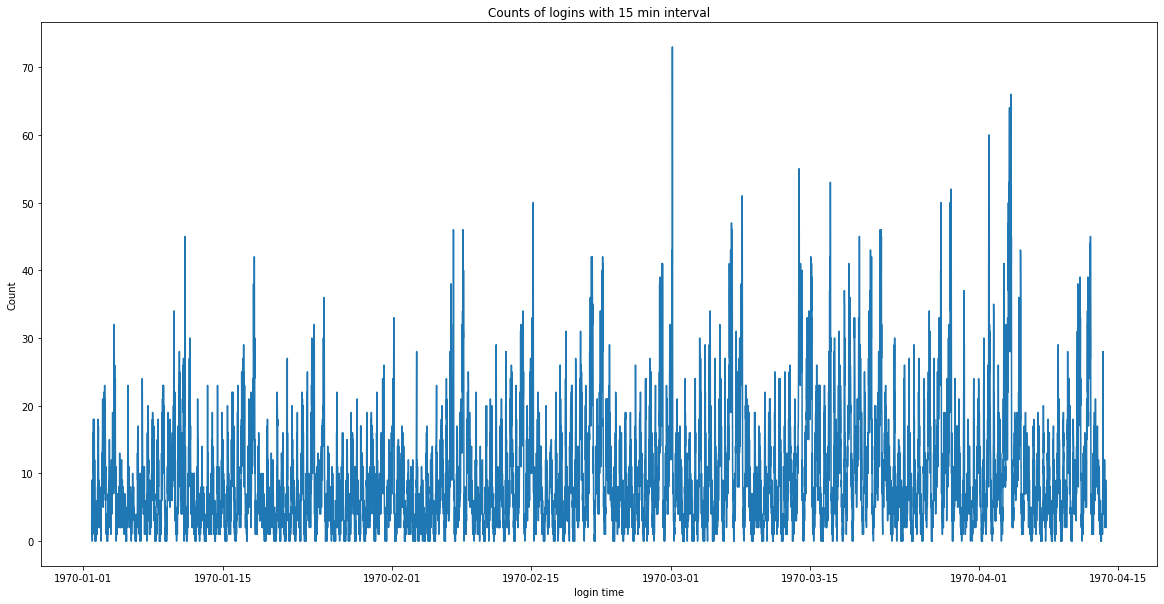

In [10]:
x = df['login_time']
y = df['Count']


plt.figure(figsize=(20,10))
plt.plot(x, y)


plt.xlabel('login time')
plt.title('Counts of logins with 15 min interval')
plt.ylabel('Count')

plt.show()

A definite pattern emerges.  I suspect the peaks are occuring during the weekend evening hours and between these weekly peeks are like rush hour times.  But we will have to look more closely to see for sure.



In [11]:
df['day'] = df['login_time'].dt.dayofweek

In [12]:
df['dayofweek'] = ''

In [13]:
for i in range(len(df)):
            if df['day'].iloc[i] == 0:
                df['dayofweek'].iloc[i] = 'Monday'
            if df['day'].iloc[i] == 1:
                df['dayofweek'].iloc[i] = 'Tuesday'
            if df['day'].iloc[i] == 2:
                df['dayofweek'].iloc[i] = 'Wednesday'
            if df['day'].iloc[i] == 3:
                df['dayofweek'].iloc[i] = 'Thursday'  
            if df['day'].iloc[i] == 4:
                df['dayofweek'].iloc[i] = 'Friday'
            if df['day'].iloc[i] == 5:
                df['dayofweek'].iloc[i] = 'Saturday'
            if df['day'].iloc[i] == 6:
                df['dayofweek'].iloc[i] = 'Sunday'                 

C:\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [14]:
df.sort_values(by = 'Count', ascending = False)[0:20]

,login_time,Count,day,dayofweek
5602,1970-03-01 04:30:00,73,6,Sunday
8870,1970-04-04 05:30:00,66,5,Saturday
8854,1970-04-04 01:30:00,64,5,Saturday
8853,1970-04-04 01:15:00,63,5,Saturday
8654,1970-04-01 23:30:00,60,2,Wednesday
8868,1970-04-04 05:00:00,60,5,Saturday
8867,1970-04-04 04:45:00,59,5,Saturday
8869,1970-04-04 05:15:00,59,5,Saturday
8855,1970-04-04 01:45:00,56,5,Saturday
6825,1970-03-13 22:15:00,55,4,Friday


  So yes, the period where we are seeing most logins tend to occur on Saturday and Sunday especially in the early hours of the morning. 

# Part 2:  Experiment Metrics and Design

1)  What would you chose as the key metric of success in this experiment in encouraging driver partners to serve both cities, and why would you chose this metric?

Basically I think you will want to see if the program increases the percentage of pickups that 'Gotham based drivers' do in Metropolis and also increases the percentage of pickups in Gotham from 'Metropolis Based Drivers'

2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success.  Please  provide details on how you will implement the experiment and what statistical tets you will conduct to verify the significance of the observation.  Also how you would interpret the results to provide recommendations to the city operations team along with any caveats.

Divide the metro area into two groups.  1) Drivers from Gotham and 2) Drivers from Metropolis

Before the reimbursement program goes into effect measure the percentage of pickups that Gotham Drivers do in Metropolis and Measure the percentage of pickups from Metropolis Drivers that occur in Gotham.

P0(Go| driver is from ME)
P0(ME | driver is from Go)

After the reimbursement goes into effect measure these things again.

P1(Go| driver is from ME)
P1(ME | driver is from Go)

Then compare P0 and P1 for the two groups using a student T-Test which will compare medians of two groups.

The null hypothesis will be that the percentages do not change.  

We will look at the p-value of our t test to determine whether the differences in the medians of the two groups are statistically significant.

# Part 3:  Predictive Modeling

In [15]:
df_ultimate = pd.read_json("ultimate_data_challenge.json")

## Data Wrangling

In [16]:
df_ultimate.head(11)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0
6,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0
7,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0
8,Winterfell,2,2014-01-21,4.5,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0
9,Winterfell,1,2014-01-03,NaN,1.00,2014-01-05,Android,0.0,False,0.0,2.37,5.0


In [17]:
len(df_ultimate)

50000

In [18]:
df_ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


## Impute Values

##### Looks like three columns have some missing data.  So lets look into those and impute values if necessary.


In [19]:
df_ultimate['avg_rating_of_driver'].fillna(df_ultimate['avg_rating_of_driver'].median(), inplace = True)

In [20]:
df_ultimate['phone'].value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [21]:
df_ultimate['phone'].fillna('iPhone', inplace = True)

In [22]:
df_ultimate['avg_rating_by_driver'].fillna(df_ultimate['avg_rating_by_driver'].median(), inplace = True)

In [23]:
df_ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    50000 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   50000 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    50000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


## Exploratory Data Analysis

#### Preliminary Visualization

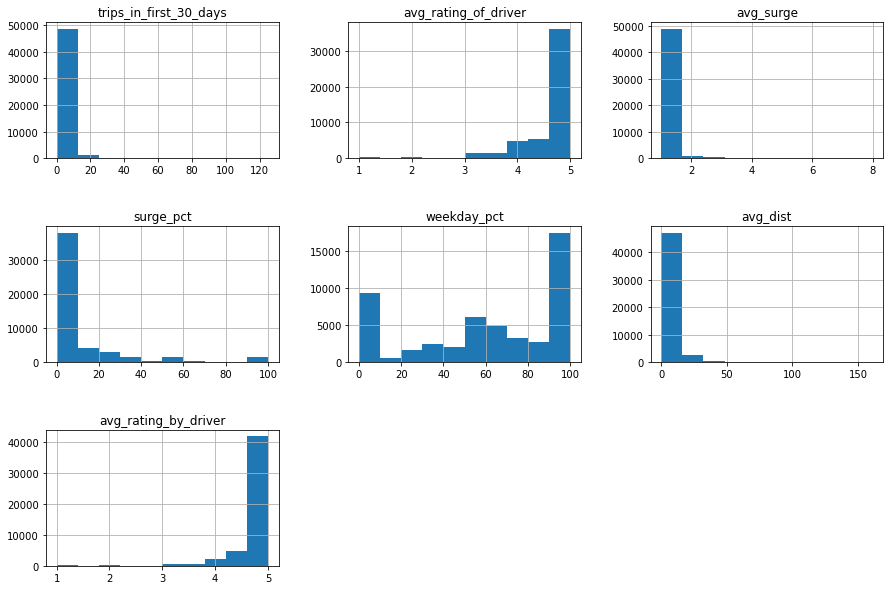

In [24]:
df_ultimate.hist(figsize = (15,10))
plt.subplots_adjust(hspace=0.5)
plt.savefig('review.of.variables.png')

In [25]:
# Nothing looks really strange here.  

## Create Variable Y (Active User)

  In the instructions it tells us that we are looking for active users defined as those who took a trip in the last 30 days.  Our dataset doesnt have a date, so lets use the max date to approximate.

In [26]:
df_ultimate['last_trip_date'] = df_ultimate['last_trip_date'].astype("datetime64")
df_ultimate['signup_date'] = df_ultimate['signup_date'].astype("datetime64")

In [27]:
today = df_ultimate['last_trip_date'].max()
today

Timestamp('2014-07-01 00:00:00')

In [28]:
cutoff_date = today + pd.Timedelta('-30days')
cutoff_date

Timestamp('2014-06-01 00:00:00')

In [29]:
df_ultimate['active'] = 0
for i in range(len(df_ultimate)):
    if df_ultimate['last_trip_date'].iloc[i] >= cutoff_date:
        df_ultimate['active'].iloc[i] = df_ultimate['active'].iloc[i] + 1
    else:
        pass
    

C:\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [30]:
df_ultimate.head(4)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1


In [31]:
#  ok so we created df_ultimate['active'] and this is going to be the variable we ultimately want to predict.

In [32]:
df_ultimate['active'].value_counts()

0    31196
1    18804
Name: active, dtype: int64

In [33]:
df_ultimate['active'].sum()

18804

In [34]:
print('Ultimately, ',round((df_ultimate['active'].sum() / df_ultimate['active'].count() ) *100, 2) , ' percent of users remained active after 6 months')

Ultimately,  37.61  percent of users remained active after 6 months


## Create New Variable - Days Since Last Trip

In [35]:
#lets also convert the last date trip to a days since last trip so we can get rid of the datetime column for a regression

In [36]:
df_ultimate['time_delta'] = (today - df_ultimate['last_trip_date'])  / np.timedelta64(1,'D')
# creating a new variable called time_delta which is the number of days since the last trip bc last_trip_date will not work with regression

I realize that in many ways this variable is capturing the same information as the 'active' variable and we should consider removing it.

## Create Dummy Variables for Categorical Data

##### Categorical Variables are City And Phone

In [37]:
df_ultimate['city'].value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

In [38]:
df_ultimate = pd.get_dummies(df_ultimate, drop_first = True)

In [39]:
df_ultimate.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,time_delta,city_King's Landing,city_Winterfell,phone_iPhone
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,True,46.2,3.67,5.0,1,14.0,1,0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,False,50.0,8.26,5.0,0,57.0,0,0,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,False,100.0,0.77,5.0,0,175.0,0,0,1
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,True,80.0,2.36,4.9,1,2.0,1,0,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,False,82.4,3.13,4.9,0,108.0,0,1,0


# Random Forest Feature Importance

In [40]:
y = df_ultimate['active']
df_X = df_ultimate.drop(columns=['active'])
df_X = df_X.drop(columns = ['signup_date'])
df_X = df_X.drop(columns = ['time_delta'])
X = df_X.drop(columns = ['last_trip_date'])

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X, y)

RandomForestClassifier()

Text(0.5, 1.0, 'Feature Importances for Ultimate Challenge')

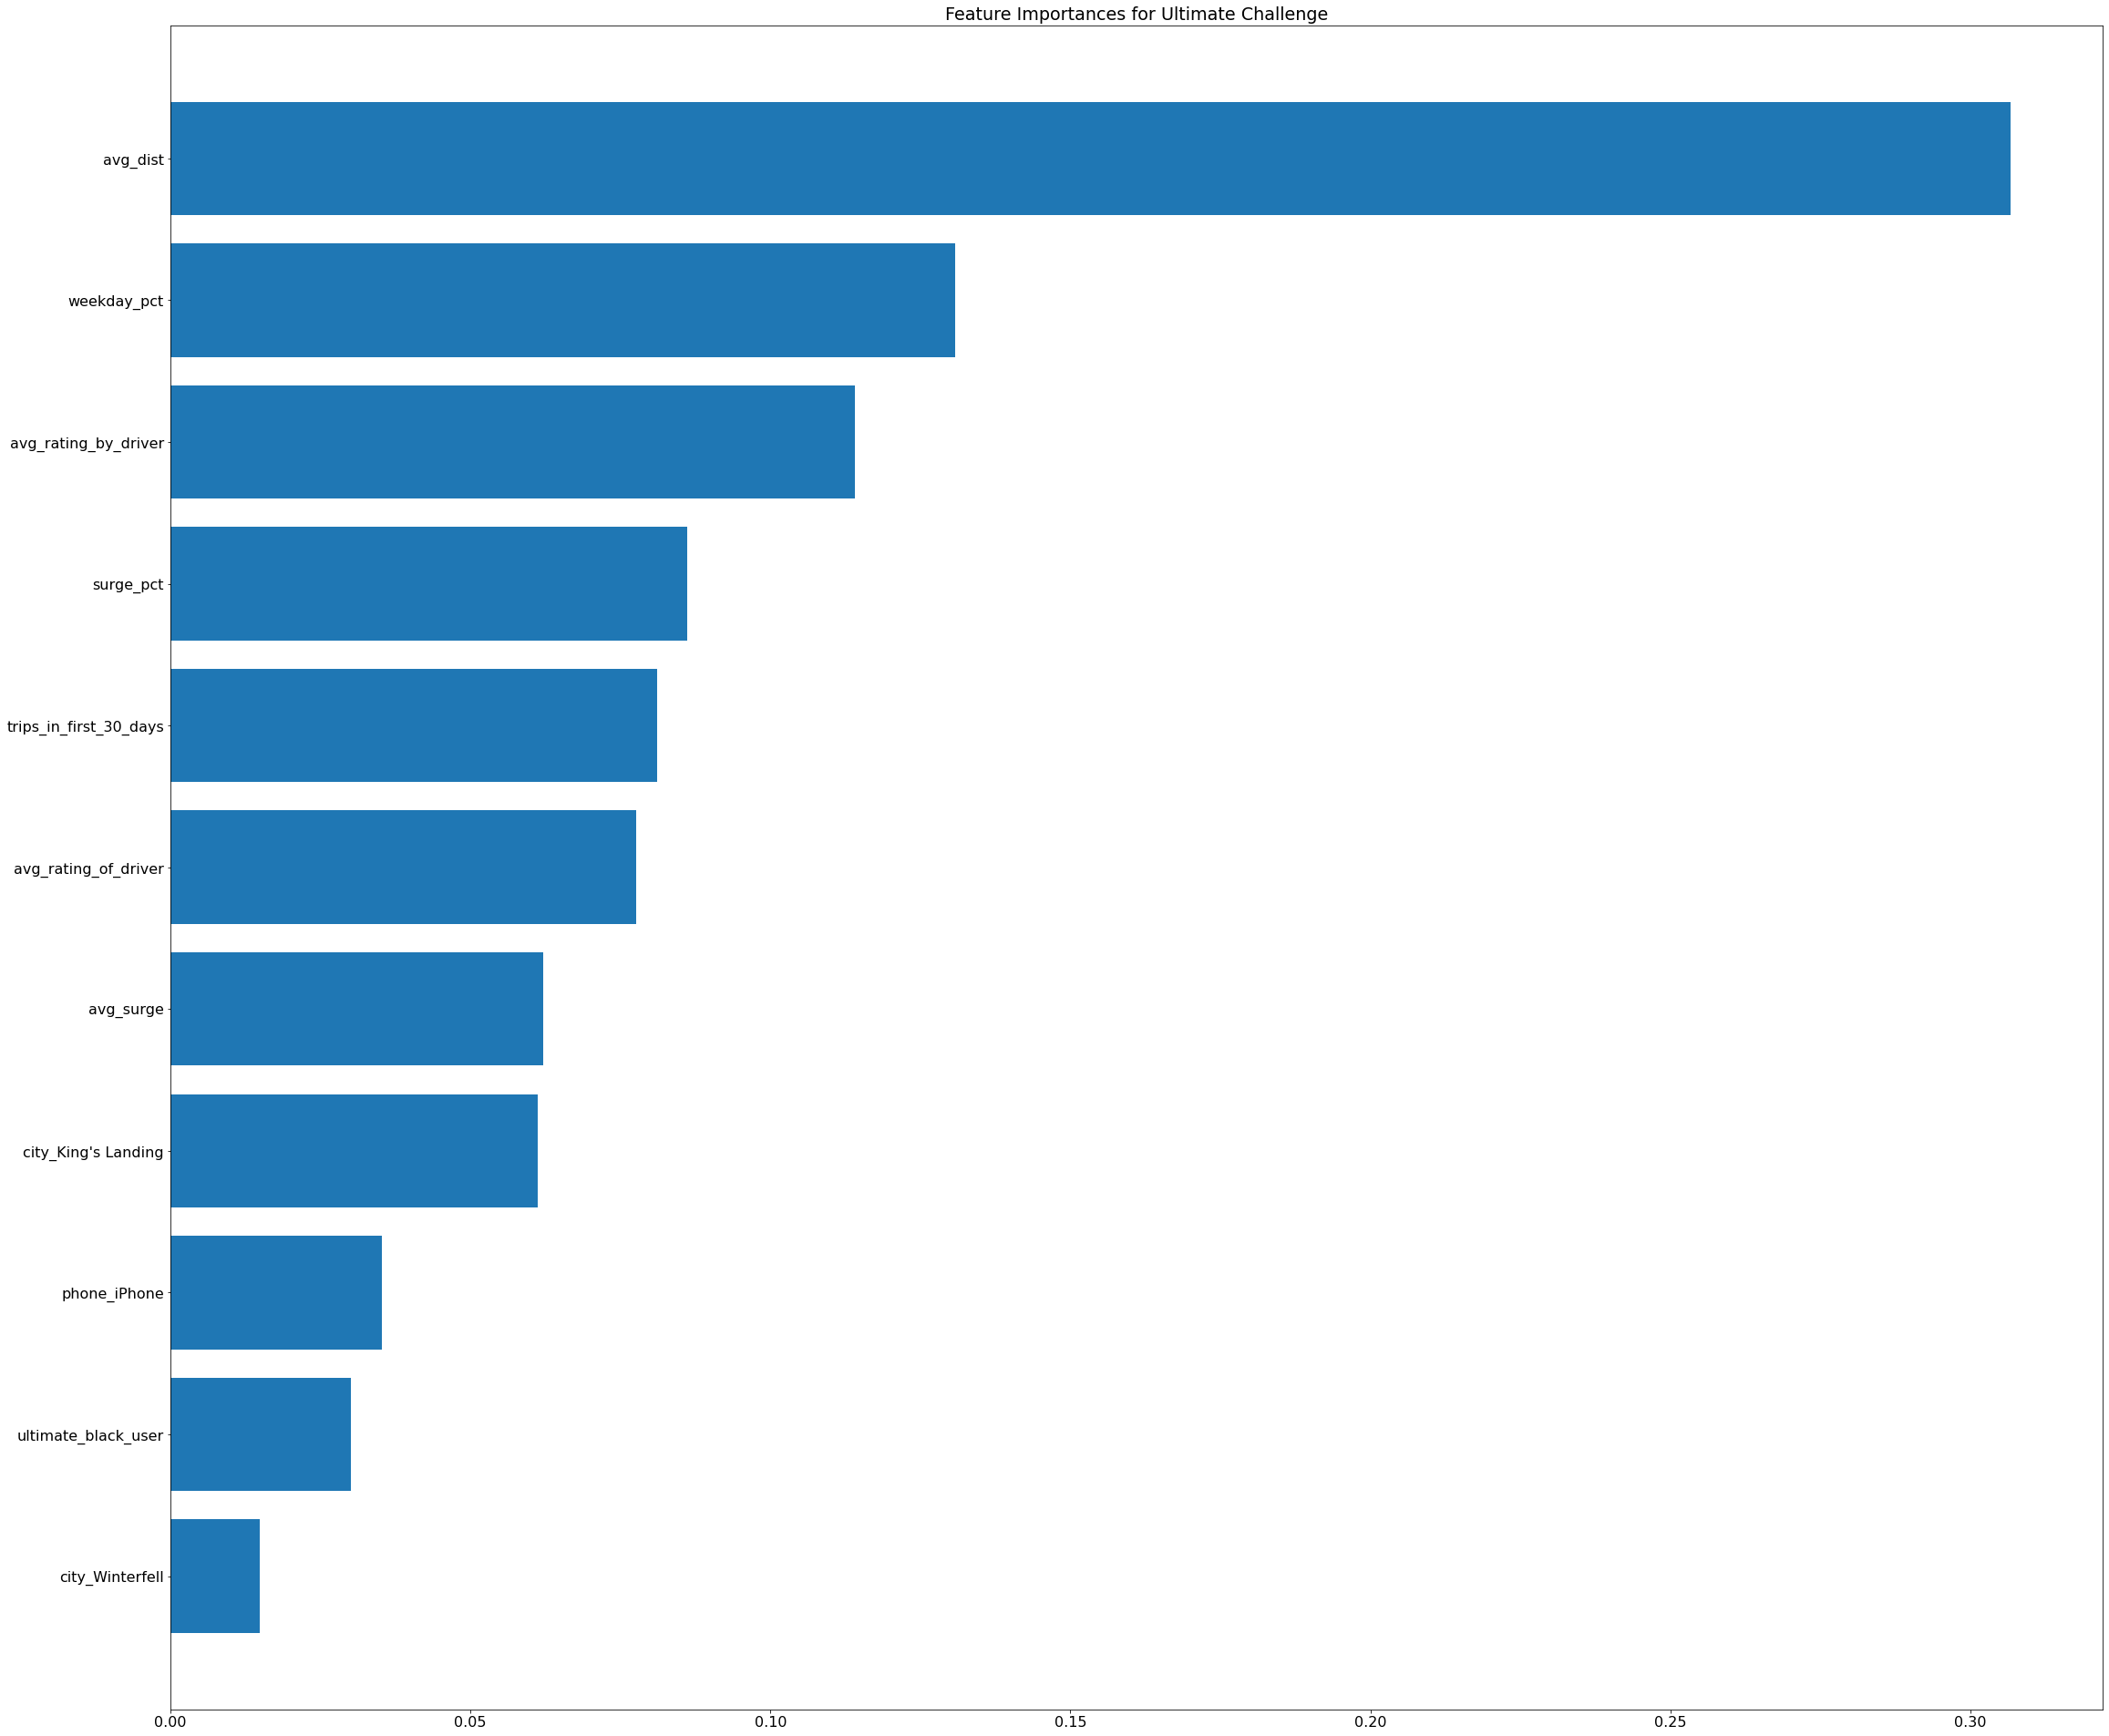

In [42]:
plt.rcParams.update({'figure.figsize': (38.0,34.0)})
plt.rcParams.update({'font.size': 16})

sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.title("Feature Importances for Ultimate Challenge")

## Histograms of Top Variables

Text(0.5, 1.0, 'Histogram of Time Since Last Ride (days)')

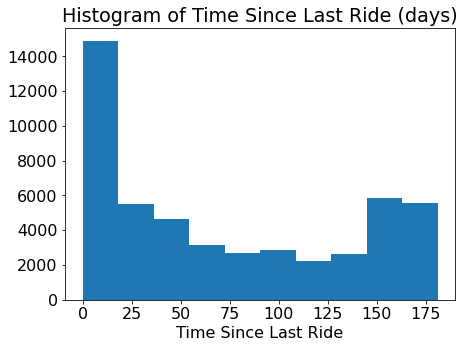

In [43]:
#  Histogram of time_delta variable
plt.rcParams.update({'figure.figsize': (7.0, 5.0)})
plt.hist(df_ultimate['time_delta'])
plt.xlabel('Time Since Last Ride')
plt.title('Histogram of Time Since Last Ride (days)')

Text(0.5, 1.0, 'Histogram of Average Rating By Driver')

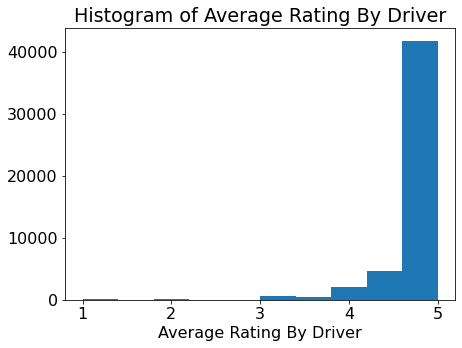

In [44]:
#  Histogram of avg_rating_by_driver variable
plt.rcParams.update({'figure.figsize': (7.0, 5.0)})
plt.hist(df_ultimate['avg_rating_by_driver'])
plt.xlabel('Average Rating By Driver')
plt.title('Histogram of Average Rating By Driver')

# Modeling

#### Train Test Split

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=9)

#### Scaling 

In [46]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Fit Random Forest Classifier

In [47]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [48]:
y_train_pred = rf.predict(X_train_scaled)
y_pred = rf.predict(X_test_scaled)

In [58]:
from sklearn.model_selection import GridSearchCV

n_est = [int(n) for n in np.logspace(start=2.9, stop=4, num=5)]
#depth = [int(x) for x in np.linspace(10, 100, num = 10)]
depth = [1, 3, 5, 10, 20, 60, 100]
param_grid = {'n_estimators': n_est, 'max_depth' : depth}
rf = RandomForestClassifier(random_state = 1519)
rf_cv = GridSearchCV(rf, param_grid, cv = 5)
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1519),
             param_grid={'max_depth': [1, 3, 5, 10, 20, 60, 100],
                         'n_estimators': [794, 1496, 2818, 5308, 10000]})

In [59]:
print("Best Score:" + str(rf_cv.best_score_))
print("Best Parameters: " + str(rf_cv.best_params_))

Best Score:0.7840266666666666
Best Parameters: {'max_depth': 10, 'n_estimators': 5308}


In [62]:
rf = RandomForestClassifier(n_estimators=5308, max_depth = 10)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10, n_estimators=5308)

In [63]:
y_train_pred = rf.predict(X_train_scaled)
y_pred = rf.predict(X_test_scaled)

#### Evaluation Metrics

In [64]:
from sklearn import tree, metrics
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = 0))

Accuracy: 0.78592
Balanced accuracy: 0.7611872700359807
Precision score 0.7421278625954199
Recall score 0.8613035668462921


In [65]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

True Positives: 3111
False Positives: 1081
True Negatives: 6713
False Negatives: 1595


In [66]:
pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['Predicted Inactive', "Predicted Active"], index=['Actual Inactive', 'Actual Active'])

,Predicted Inactive,Predicted Active
Actual Inactive,6713,1081
Actual Active,1595,3111


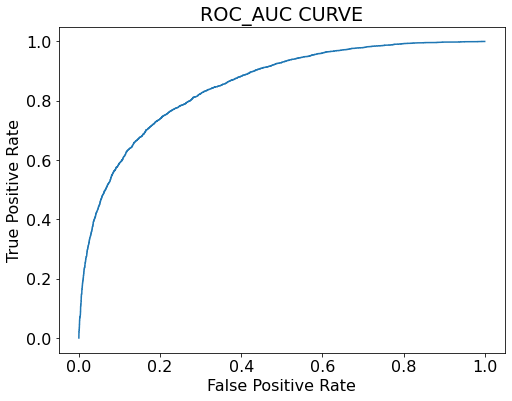

In [67]:
y_pred_proba = rf.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
plt.rcParams.update({'figure.figsize': (8, 6.0)})
#create ROC curve
plt.plot(fpr,tpr)
plt.title("ROC_AUC CURVE")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Conclusion

When it comes to predicting whether a user will be active after 6 months, the most important factors to consider are the average distance of the trip, the percentage of trips that occur during the weekday, the average rating by the driver, the surge percentage, and the number of trips made in the first day.  

Promotions and advertising should focus on improving metrics in these categories.

First is average distance.  People who use the app for longer trips are more likely to use the app more.  This could be based on factors like disposable income that are beyond the control of the app.  Those with more disposable income are perhaps more likely to pay for longer trips and also to use the app more frequently.  However, some of this may be behavioral and promotions could be focused on encouraging to use the app for longer trips.  A promotion like 'half price rides to the airport' could encourage people to use the app for longer trips.

Second is weekday percentage.  Often people commute during the week and the method by which a person commutes is usually the same day after day. So a promotion for new users like free trips on Monday may encourage users to incorporate the app into their regular commute or workday pattern.

Third is Average Rating by Driver.  Education campaign about how to use the app may lead to higher rating by drivers and more repeat customers.

Fourth is surge percentage.  This could also go back to factors such as disposable income where those users with more disposable income are more likely to pay surge pricing AND more likely to pay for more rides.  However, there could be an issue of perception where new users see surge pricing and do not want to use the app because they perceive it to be too expensive.  If that is the case a promotion like 'no surge pricing' for the first 30 days may alleviate 'sticker shock' associated with surge prices.

Fifth is 'Trips in the First 30 days'.  This seems straightforward where the app should focus promotions on getting people to use the app as soon as or shortly after they sign-up.  New user promotions may encourage people to adapt to using the app.